c:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
c:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
c:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
c:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


(60000, 784)


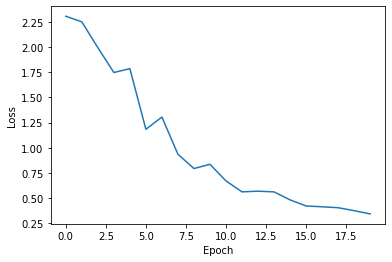

Actual: 5
Predicted: tensor(3)


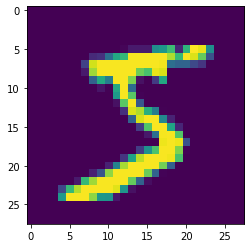

In [16]:
import numpy as np
from matplotlib import pyplot as plt
import torch

# Load the MNIST dataset
from torchvision.datasets import MNIST
dataset = MNIST(root='.', download=True)

# Preprocess the data
X_train = dataset.train_data.numpy().reshape((-1, 28*28)) / 255.0
X_test = dataset.test_data.numpy().reshape((-1, 28*28)) / 255.0
y_train = dataset.train_labels.numpy()
y_test = dataset.test_labels.numpy()
print(X_train.shape)

# Convert the labels to one-hot encoded vectors
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

# Create the neural network
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, 128)
        self.fc2 = torch.nn.Linear(128, 128)
        self.fc3 = torch.nn.Linear(128, 128)
        self.fc4 = torch.nn.Linear(128, 10)

    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = torch.nn.functional.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = Net()

# Define the loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
numEpochs = 20
history = np.zeros(shape=(numEpochs), dtype=float)
# Train the model
for epoch in range(numEpochs):
    # Forward pass
    outputs = model(torch.tensor(X_train, dtype=torch.float))
    loss = loss_fn(outputs, torch.tensor(y_train, dtype=torch.float))

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    history[epoch] = loss.item()
    

#Plot the error rate
plt.plot(history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
test = X_test[0].reshape((28,28))
plt.imshow(test)
print("Actual:", np.argmax(y_test[0]))
model.eval()
print("Predicted:", torch.argmax(model(torch.tensor(test.flatten(), dtype=torch.float))))



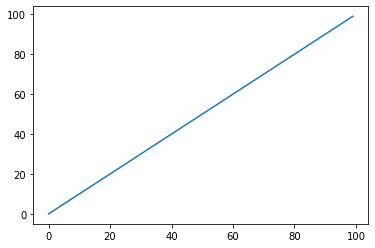

In [2]:
import numpy as np
from matplotlib import pyplot as plt

a = np.arange(100, dtype=float)
plt.plot(a)
plt.show()